# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 43.0 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 49.9 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.9 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 69.3 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 61.4 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 63.4 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 68.7 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 59.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 61.4 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 69.0 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 12.3 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 69.4 MB/s eta 0:00:01
     |██████████████████

In [2]:
!pip install --upgrade jupyter ipywidgets


Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: jupyter in /root/.local/lib/python3.7/site-packages (1.0.0)
     |████████████████████████████████| 139 kB 631 kB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 89 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 386 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 229 kB 1.8 MB/s eta 0:00:01
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.
ERROR: jupyter-client 7.4.9 has requirement pyzmq>=23.0, but you'll have pyzmq 19.0.0 which is incompatible.
ERROR: jupyter-client 7.4.9 has requirement tornado>=6.2, but you'll have tornad

## Imports

In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
# Define transforms

transform = transforms.Compose([
    transforms.RandomCrop(28, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load the MNIST training and testing datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


# Define batch size (adjust based on your GPU memory)
batch_size = 64

# Create training set and define training dataloader
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


# Create test set and define test dataloader
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

### Justification for Preprocessing Choices in MNIST Deep Learning Model

The provided preprocessing steps in the `transform` object are specifically chosen to enhance a deep learning model's performance on the MNIST handwritten digit recognition task. Here's a breakdown of the reasoning behind each step:

**Normalization:**

* **`transforms.ToTensor()`:** Converts the MNIST images, typically stored as uint8 values (0-255), into PyTorch tensors (usually floats between 0-1). This prepares the data for mathematical operations within the deep learning model.
* **`transforms.Normalize()`:** Normalizes the pixel intensities based on the mean (0.1307) and standard deviation (0.3081) of the MNIST dataset. This centers the data around a common range, which can accelerate the model's training convergence.

**Data Augmentation:**

* **`transforms.RandomCrop(28, padding=4)`:** Introduces variations in digit location and size. During training, the model sees different cropped versions of the same digit, making it more resilient to minor shifts or centering variations within the image.
* **`transforms.RandomHorizontalFlip()`:** Randomly flips the image horizontally. This helps the model recognize digits regardless of their orientation (e.g., a flipped "7" remains a "7").
* **`transforms.RandomRotation(degrees=15)`:** Randomly rotates the image by a small amount (up to 15 degrees). This helps the model learn to recognize digits even if they're slightly tilted.
* **`transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4)`:** Randomly adjusts brightness, contrast, and saturation within a specified range. This simulates variations in lighting conditions or camera settings, making the model more robust to real-world input variations.

By applying these preprocessing steps, we artificially expand the diversity of the training data. The model encounters more variations of the same digit, enhancing its ability to generalize well to unseen examples during testing. This is particularly crucial for handwritten digit recognition, where digits can exhibit slight differences due to variations in writing style.


## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [6]:
# Print train data size and shape
print("Train Data Size:", len(train_dataset))
print("Train Data Shape (Single Example):", train_dataset[0][0].shape)

Train Data Size: 60000
Train Data Shape (Single Example): torch.Size([1, 28, 28])


In [7]:
# Print test data size and shape
print("Test Data Size:", len(test_dataset))
print("Test Data Shape (Single Example):", test_dataset[0][0].shape)


Test Data Size: 10000
Test Data Shape (Single Example): torch.Size([1, 28, 28])


In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

1


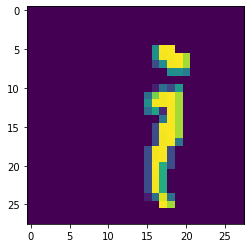

2


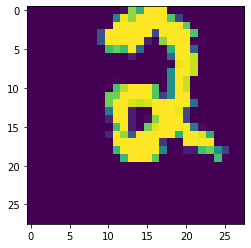

3


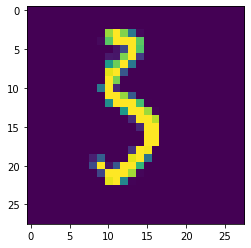

6


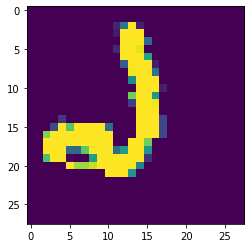

5


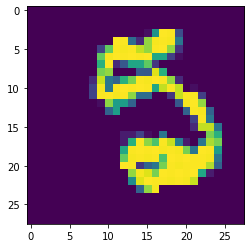

In [6]:
# Explore data
show5(train_dataloader)

7


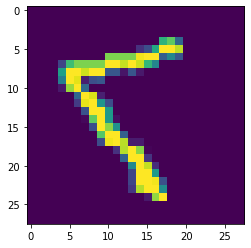

2


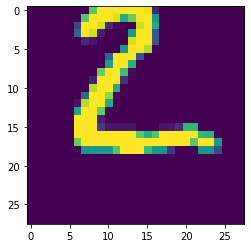

1


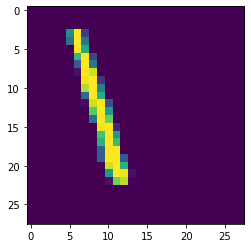

0


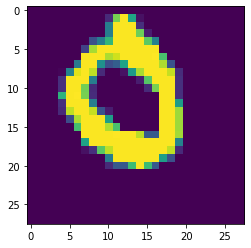

4


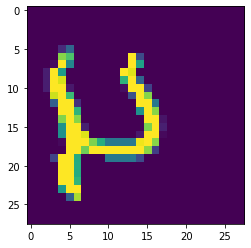

In [7]:
# Explore data
show5(test_dataloader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [8]:
import torch
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()

        # Input layer (flatten the image)
        self.flatten = nn.Flatten()

        # Fully-connected layers
        self.fc1 = nn.Linear(1 * 28 * 28, 256)  # Input: 784 pixels (flattened image), Output: 256 neurons
        self.fc2 = nn.Linear(256, 128)  # Input: 256 neurons, Output: 128 neurons
        self.fc3 = nn.Linear(128, 10)   # Input: 128 neurons, Output: 10 neurons (one for each digit)

    def forward(self, x):
        # Flatten the input image
        x = self.flatten(x)

        # Apply fully-connected layers with activation functions
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1)  # Output layer with log-softmax for multi-class classification

        return x


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [9]:
# Hyperparameters
num_epochs = 10
batch_size = batch_size # from data processing step 
learning_rate = 0.001  

In [10]:
# Instantiate the model
model = NeuralNetwork()

model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)

In [11]:
# Specify the loss function (Cross-Entropy Loss for multi-class classification)
criterion = nn.CrossEntropyLoss()

# Specify the optimizer (Adam is a popular choice for various tasks)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  # Adjust learning rate as needed

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [12]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device

device(type='cuda')

In [13]:
# Move the model and data loaders to the chosen device
model.to(device)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)

In [14]:
# Training loop
train_losses = []  # Store average loss per epoch
train_accuracies = []  # Store average accuracy per epoch
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(train_dataloader, 0):
        # Get inputs and labels (move to device if using GPU)
        inputs, labels = data[0].to(device), data[1].to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass, calculate loss
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Update running loss
        running_loss += loss.item()

        # Calculate accuracy for this batch
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Print loss and accuracy every 250 batches (optional)
        if i % 250 == 249:  # Print after completing a batch cycle
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_dataloader)}], Loss: {running_loss/250:.3f}, Accuracy: {100 * correct / total:.3f}%")
            running_loss = 0.0

    # Calculate and store average loss and accuracy per epoch
    epoch_loss = running_loss / len(train_dataloader)
    train_losses.append(epoch_loss)
    train_accuracies.append(100 * correct / total)  # Accuracy as percentage


Epoch [1/10], Step [250/938], Loss: 1.316, Accuracy: 54.731%
Epoch [1/10], Step [500/938], Loss: 0.762, Accuracy: 64.994%
Epoch [1/10], Step [750/938], Loss: 0.610, Accuracy: 70.094%
Epoch [2/10], Step [250/938], Loss: 0.511, Accuracy: 83.775%
Epoch [2/10], Step [500/938], Loss: 0.479, Accuracy: 84.275%
Epoch [2/10], Step [750/938], Loss: 0.444, Accuracy: 84.827%
Epoch [3/10], Step [250/938], Loss: 0.415, Accuracy: 86.506%
Epoch [3/10], Step [500/938], Loss: 0.390, Accuracy: 86.909%
Epoch [3/10], Step [750/938], Loss: 0.386, Accuracy: 87.119%
Epoch [4/10], Step [250/938], Loss: 0.353, Accuracy: 88.544%
Epoch [4/10], Step [500/938], Loss: 0.352, Accuracy: 88.541%
Epoch [4/10], Step [750/938], Loss: 0.332, Accuracy: 88.765%
Epoch [5/10], Step [250/938], Loss: 0.334, Accuracy: 89.062%
Epoch [5/10], Step [500/938], Loss: 0.319, Accuracy: 89.400%
Epoch [5/10], Step [750/938], Loss: 0.329, Accuracy: 89.419%
Epoch [6/10], Step [250/938], Loss: 0.306, Accuracy: 89.975%
Epoch [6/10], Step [500/

Plot the training loss (and validation loss/accuracy, if recorded).

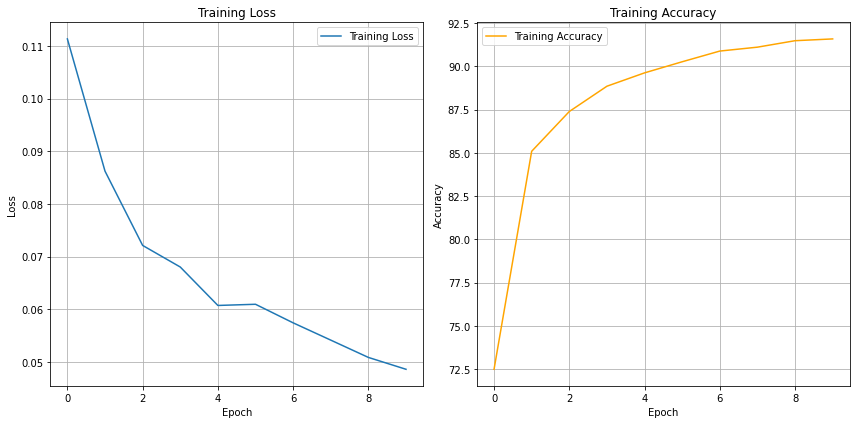

In [15]:
# Plot training loss and accuracy (side-by-side)
plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)  # Left subplot for loss
plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)

# Plot training accuracy
plt.subplot(1, 2, 2)  # Right subplot for accuracy
plt.plot(range(len(train_accuracies)), train_accuracies, label='Training Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [16]:
# Function to calculate test accuracy
def test_model(model, test_dataloader):
    correct = 0
    total = 0

    # Set model to evaluation mode (optional)
    model.eval()

    with torch.no_grad():
        for data in test_dataloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)

            # Get the predicted class with the highest probability
            _, predicted = torch.max(outputs.data, 1)

            # Update total and correct predictions
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.3f}%")

# Test the model
test_model(model, test_dataloader)


Test Accuracy: 92.280%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [17]:
# With a Test Accuracy of 92.280%, I prefer to stop there for now.

## Saving your model
Using `torch.save`, save your model for future loading.

In [18]:
# Save the trained model 
model_filename = "nathanbangwa243_MNIST_trained_model.pth"
torch.save(model.state_dict(), model_filename)
print(f"Model saved to: {model_filename}")

Model saved to: nathanbangwa243_MNIST_trained_model.pth


In [19]:
ls -lh --block-size=M

total 2M
drwxr-xr-x 3 root root 1M Jun  5 01:34 data/
-rw-r--r-- 1 root root 1M Jun  5 01:46 MNIST_Handwritten_Digits-STARTER.ipynb
-rw-r--r-- 1 root root 1M Jun  5 01:47 nathanbangwa243_MNIST_trained_model.pth
-rw-r--r-- 1 root root 1M Aug 12  2023 requirements.txt
